In [1]:
#  Copyright (c) 2022 Charlie Payne
#  Licence: GNU GPLv3

# https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
# https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

import pandas as pd
import numpy as np

In [2]:
# load in the data

data_dir = '../data/intermediates'
fname = 'feature_gen_cond1_pat59to74.csv'

X = pd.read_csv(data_dir + '/' + fname)
print(X)

    FT8__variance_larger_than_standard_deviation  FT8__has_duplicate  \
0                                            1.0                 1.0   
1                                            1.0                 1.0   
2                                            1.0                 1.0   
3                                            1.0                 1.0   
4                                            1.0                 1.0   
5                                            1.0                 1.0   
6                                            1.0                 1.0   
7                                            1.0                 1.0   
8                                            1.0                 1.0   
9                                            1.0                 1.0   
10                                           1.0                 1.0   
11                                           1.0                 1.0   
12                                           1.0                

In [3]:
# create the response vector

response_HC = {str(val): 0 for val in range(59, 66+1)}  # 0 = HC = Healthy Control
response_SZ = {str(val): 1 for val in range(67, 74+1)}  # 1 = SZ = Schizophrenia

response_dict = dict(response_HC, **response_SZ)
print(response_dict)
y = pd.Series(response_dict.values(), name='class')
print(y)

{'59': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 0, '65': 0, '66': 0, '67': 1, '68': 1, '69': 1, '70': 1, '71': 1, '72': 1, '73': 1, '74': 1}
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: class, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# split the data: training, testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train)
print(y_train)
print('\n---------------------------------\n')
print(X_test)
print(y_test)

    FT8__variance_larger_than_standard_deviation  FT8__has_duplicate  \
13                                           1.0                 1.0   
4                                            1.0                 1.0   
2                                            1.0                 1.0   
14                                           1.0                 1.0   
10                                           1.0                 1.0   
7                                            1.0                 1.0   
15                                           1.0                 1.0   
11                                           1.0                 1.0   
3                                            1.0                 1.0   
0                                            1.0                 1.0   
5                                            1.0                 1.0   
12                                           1.0                 1.0   

    FT8__sum_values  FT8__abs_energy  FT8__mean_abs_change  FT8

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [7]:
# scale the data for optimized performance

sc = StandardScaler()  # scale via Z-score
X_train = sc.fit_transform(X_train)  # fit and transform the X_train data via Z-score
X_test = sc.transform(X_test)        # transform the X_test data using the mean and standard deviation fit from X_train

In [8]:
from sklearn.decomposition import PCA

In [9]:
# run PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
import matplotlib.pyplot as plt

[1.83817794e-01 1.32260494e-01 1.06560006e-01 9.60164627e-02
 8.89696477e-02 7.76355752e-02 7.55023788e-02 6.85584000e-02
 6.20619439e-02 5.62059477e-02 5.24113487e-02 4.23333253e-31]
12


Text(0.5, 1.0, 'explained variance')

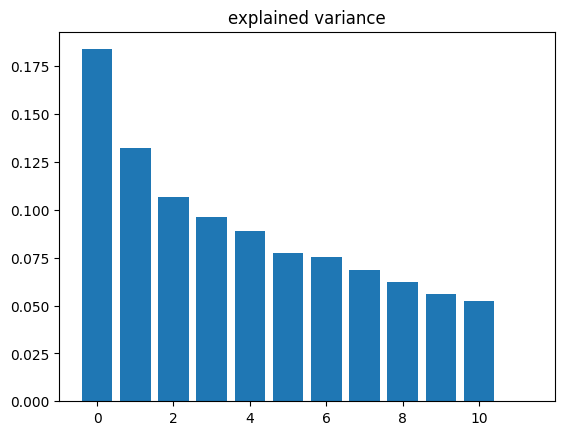

In [11]:
# plot the explained variance

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(len(explained_variance))

plt.bar(range(0, len(explained_variance)), explained_variance)
plt.title('explained variance')

[0.18381779442444504, 0.31607828876179456, 0.42263829518090035, 0.5186547578701968, 0.6076244055817638, 0.685259980782887, 0.760762359604621, 0.829320759604335, 0.8913827035455733, 0.9475886512514362, 1.0, 1.0]


Text(0.5, 1.0, 'cummulative explained variance')

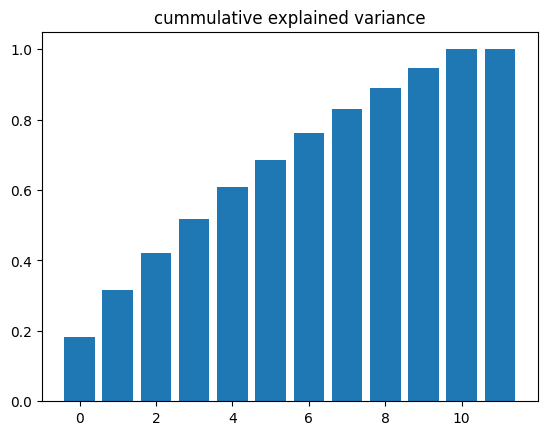

In [12]:
# plot the cummulative explained variance

sum = 0
cummulative_ev = []
for ii in range(len(explained_variance)):
    sum += explained_variance[ii]
    cummulative_ev.append(sum)
print(cummulative_ev)

plt.bar(range(0, len(cummulative_ev)), cummulative_ev)
plt.title('cummulative explained variance')

In [13]:
print(X_train)
print(X_train[1][2])  # row = data point, column = principal component
print(X_train.shape)

[[ 1.26033231e+02 -1.30726672e+02 -2.72979828e+01 -1.16896959e+02
  -1.05170304e+02 -7.23549897e+01  1.72342566e+01  1.12668661e+01
   8.72102238e+00  5.97030714e+00  1.13838666e+01  1.47693994e-13]
 [-1.37994658e+01  1.07767827e+01 -5.45334050e+01 -6.10438847e+01
   2.34511951e+01  1.35181943e+02  1.22497509e+02 -3.98666964e+00
   5.29802461e+01 -2.48223423e+01  8.70381766e+00  1.47693994e-13]
 [ 1.51563737e+01 -1.38529166e+01 -2.04418861e+00  1.25842651e+02
  -1.32704605e+02  7.75413352e+01 -5.73982046e+01  5.61503320e+01
   2.97409804e+01 -1.27193489e+01 -2.98449790e+01  1.47693994e-13]
 [-9.24772079e+01 -2.72974804e+01 -2.83108269e+01  6.69276276e+01
  -9.07032593e+00 -3.31497332e+01  1.59887384e+01 -1.86633800e+01
  -4.81787224e+01 -5.33845582e+01  1.35212308e+02  1.47693994e-13]
 [ 6.24682684e+01  6.68031334e+01  2.28150802e+02 -2.36241038e+01
  -5.62821679e-01  7.14915129e+00  1.46414450e+01 -3.07307011e+00
   4.48686573e+00 -1.22871130e+01  2.38930188e+01  1.47693994e-13]
 [ 1.

In [14]:
# split out training data into control and schizophrenia

X_HC = np.empty((0, X_train.shape[1]))
X_SZ = np.empty((0, X_train.shape[1]))

for ii in range(len(y_train)):
    if y_train.iloc[ii] == 0:
        print(f"HC: {ii}, {y_train.index[ii]}")
        X_HC = np.append(X_HC, [X_train[ii, :]], axis=0)
    elif y_train.iloc[ii] == 1:
        print(f"SZ: {ii}, {y_train.index[ii]}")
        X_SZ = np.append(X_SZ, [X_train[ii, :]], axis=0)

print(X_HC)
print('\n--------------------\n')
print(X_SZ)

SZ: 0, 13
HC: 1, 4
HC: 2, 2
SZ: 3, 14
SZ: 4, 10
HC: 5, 7
SZ: 6, 15
SZ: 7, 11
HC: 8, 3
HC: 9, 0
HC: 10, 5
SZ: 11, 12
[[-1.37994658e+01  1.07767827e+01 -5.45334050e+01 -6.10438847e+01
   2.34511951e+01  1.35181943e+02  1.22497509e+02 -3.98666964e+00
   5.29802461e+01 -2.48223423e+01  8.70381766e+00  1.47693994e-13]
 [ 1.51563737e+01 -1.38529166e+01 -2.04418861e+00  1.25842651e+02
  -1.32704605e+02  7.75413352e+01 -5.73982046e+01  5.61503320e+01
   2.97409804e+01 -1.27193489e+01 -2.98449790e+01  1.47693994e-13]
 [ 1.81960712e+02  1.85364923e+02 -9.07836840e+01  3.29103209e+01
   1.73413136e+01 -4.61870541e+01  9.37077268e+00 -1.43499058e+00
  -1.65897724e+01  9.60056759e+00  2.76174243e+00  1.47693994e-13]
 [-4.36810753e+01  2.82315311e+01 -2.26445054e+01 -9.46240947e+01
  -7.39245321e+00  7.86818865e+01 -1.12672701e+02 -6.80223341e+01
  -9.00135183e+01  1.49336118e+01 -9.78514095e+00  1.47693994e-13]
 [-8.93161723e+01 -1.62458904e+01  1.41667112e+01  5.01939277e+01
  -1.58732251e+01 -2.2

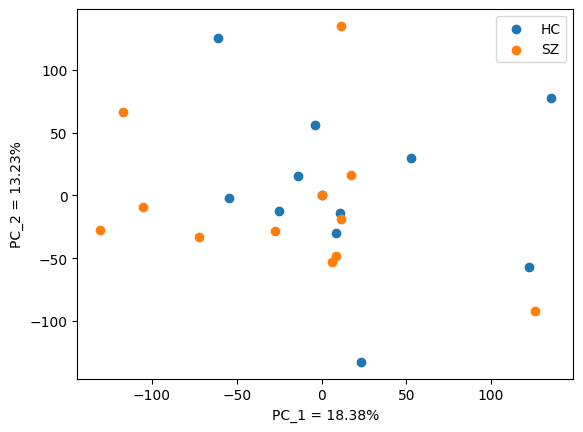

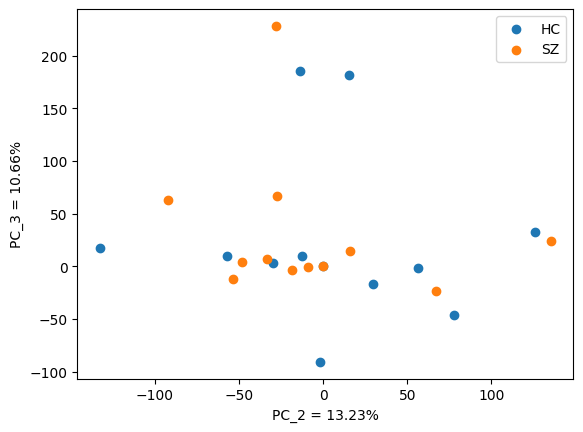

In [15]:
# plot PC_1 vs PC_2 then PC_2 vs PC_3

fig1 = plt.figure(1)
plt.scatter(X_HC[:][0], X_HC[:][1], label='HC')
plt.scatter(X_SZ[:][0], X_SZ[:][1], label='SZ')
plt.legend()
plt.xlabel(f"PC_1 = {100*explained_variance[0]:.2f}%")
plt.ylabel(f"PC_2 = {100*explained_variance[1]:.2f}%")
# plt.title(f"PCA_1 vs PCA_2, CEV = {100*cummulative_ev[1]:.2f}%")

fig2 = plt.figure(2)
plt.scatter(X_HC[:][1], X_HC[:][2], label='HC')
plt.scatter(X_SZ[:][1], X_SZ[:][2], label='SZ')
plt.xlabel(f"PC_2 = {100*explained_variance[1]:.2f}%")
plt.ylabel(f"PC_3 = {100*explained_variance[2]:.2f}%")
plt.legend()
# plt.title(f"PCA_2 vs PCA_3, CEV = {100*cummulative_ev[2]:.2f}%")

In [ ]:
 # F- I-- N---